# Data and Figures for Percolation Study

In [7]:
import pandas as pd 
from glob import glob
from collections import defaultdict
import pickle

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
from eventgraphs import EventGraph
from eventgraphs.analysis import calculate_component_distribution_over_delta, calculate_component_distribution

In [3]:
max_components = defaultdict(dict) # Maximum component size
full_components = defaultdict(dict) # Component size distribution
max_eventgraph = defaultdict(dict) # Size for entire EG
event_graph_stats = defaultdict(dict) # Overall stats
num_components = defaultdict(dict) # Number of components

for file in glob('./data/eventgraphs/*'):
    filename = file.split('/')[-1].split('.')[0]
    print(filename)
    EG = EventGraph.from_file(file)
    EG.generate_eg_matrix()
    t90 = EG.eg_edges.delta.quantile(0.9)
    dt_range = np.linspace(0,t90,100)
    
    # Component Sizes
    for size_type in ['events', 'nodes', 'duration']:
        dist, max_size = calculate_component_distribution_over_delta(EG, dt_range, size_type=size_type)
        max_components[size_type][filename] = max_size
        full_components[size_type][filename] = dist
    
        max_eventgraph[size_type][filename] = calculate_component_distribution(EG, size_type=size_type).index.max()
        
        if size_type == 'duration':
            event_graph_stats[size_type][filename] = EG.D
        elif size_type == 'events':
            event_graph_stats[size_type][filename] = EG.M
        else:
            event_graph_stats[size_type][filename] = EG.N
            
   
    # Component Sizes (could be incorporated into the above)
    for size_type in ['events', 'nodes', 'duration']:
        dist, max_size = calculate_component_distribution_over_delta(EG, 
                                                                     dt_range, 
                                                                     size_type=size_type, 
                                                                     normalize=False)
        num_components[size_type][filename] = {key:sizes.sum() for key, sizes in dist.items()}

twitter-emirates
random-er
academic-coauthors
sociopatterns-primary
social-ucirvine


In [4]:
# Save to file.
save = {'max_components':max_components,
        'full_components':full_components,
        'max_eventgraph':max_eventgraph,
        'event_graph_stats':event_graph_stats,
        'num_components':num_components,
}


with open('./data/percolation.pkl', 'wb') as file:
    pickle.dump(save, file)

In [5]:
# Load file.
with open('./data/percolation.pkl', 'rb') as file:
    complete = pickle.load(file)
    
max_components = complete['max_components']
event_graph_stats = complete['event_graph_stats']
max_eventgraph = complete['max_eventgraph']
full_components = complete['full_components']
num_components = complete['num_components']

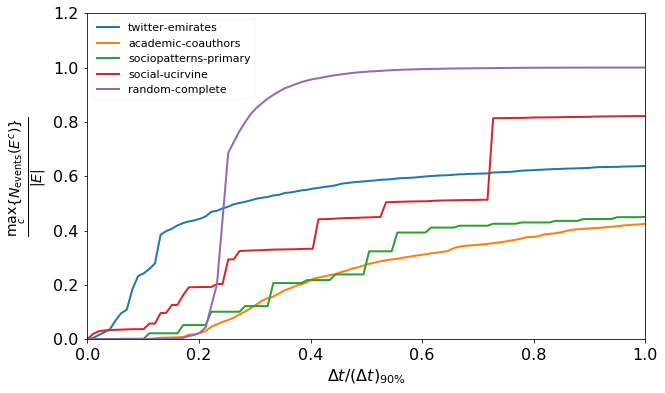

In [8]:
from plotting import PLOT_STYLE

with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    for key, val in max_components['events'].items():
        val = val/event_graph_stats['events'][key]
        val.index = np.linspace(0,1, len(val))
        val.plot(label=key, ax=ax)
    ax.legend(loc='best', fontsize=11);

    ax.set_xlim((0,1))
    ax.set_ylim((0,1.2))
    ax.set_xlabel("$\Delta t / (\Delta t)_{90\%}$")
    ax.set_ylabel(r"$\frac{\max_{c} \{ N_{\rm events}(E^c)\}}{|E|}$", fontsize=20, rotation=90);

    fig.savefig('./figures/component_size_events.eps', bbox_inches='tight')

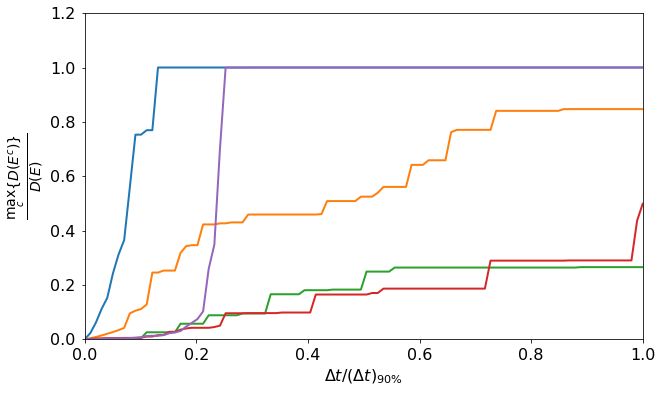

In [9]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):

    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    for key, val in max_components['duration'].items():
        val = val/event_graph_stats['duration'][key]
        val.index = np.linspace(0,1, len(val))
        val.plot(label=key, ax=ax)
    #ax.legend(loc='best', fontsize=11)

    ax.set_xlim((0,1))
    ax.set_ylim((0,1.2))
    ax.set_xlabel("$\Delta t / (\Delta t)_{90\%}$")
    ax.set_ylabel(r"$\frac{\max_{c} \{D(E^c)\}}{D(E)}$",fontsize=20, rotation=90);

    fig.savefig('./figures/component_size_duration.eps', bbox_inches='tight')

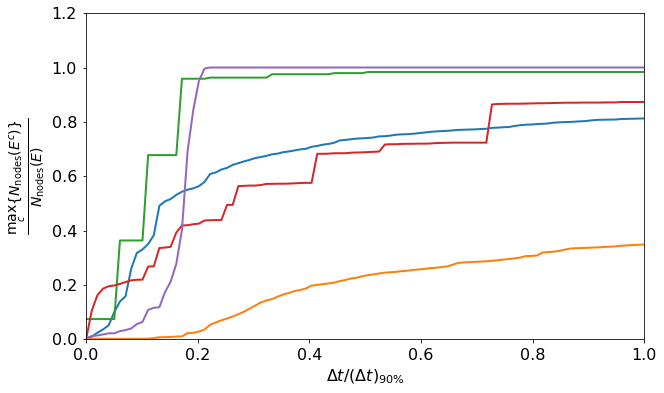

In [10]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    for key, val in max_components['nodes'].items():
        val = val/event_graph_stats['nodes'][key]
        val.index = np.linspace(0,1, len(val))
        val.plot(label=key, ax=ax)
    #ax.legend(loc='best', fontsize=14)

    ax.set_xlim((0,1))
    ax.set_ylim((0,1.2))
    ax.set_xlabel("$\Delta t / (\Delta t)_{90\%}$")
    ax.set_ylabel(r"$\frac{\max_{c}\{N_{\rm nodes}(E^c)\}}{N_{\rm nodes}(E)}$",fontsize=20, rotation=90);

    fig.savefig('./figures/component_size_nodes.eps', bbox_inches='tight')

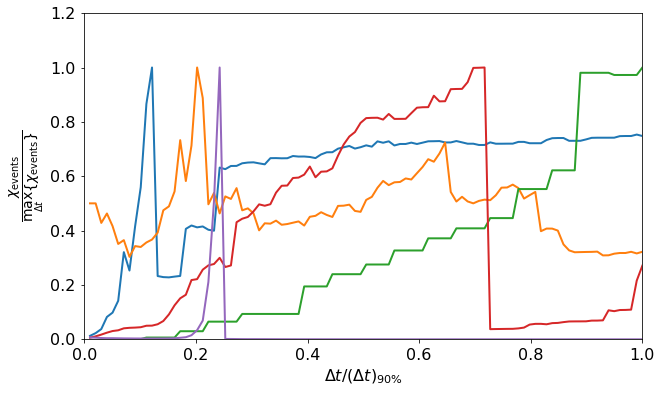

In [17]:
with plt.style.context(['seaborn-paper', PLOT_STYLE]):
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)

    for key, val in full_components['events'].items():

        ms = {}
        for t, vals in val.items():

            vals = vals.sort_index(ascending=False)
            Nc = num_components['events'][key][t]
            m = [(size**2)*frac*Nc for size, frac in vals.iloc[1:].items()]
            m = sum(m)/len(m)
            ms[t] = (m**1)/event_graph_stats['events'][key]

        ms = pd.Series(ms)
        ms = ms/ms.max()
        ms.index = np.linspace(0,1, len(ms))
        
        ms.plot()

    ax.set_xlim((0,1))
    ax.set_ylim((0,1.2))
    ax.set_xlabel("$\Delta t / (\Delta t)_{90\%}$")
    ax.set_ylabel(r"$\frac{\chi_{\rm events}}{\max_{\Delta t}\{\chi_{\rm events}\}}$",fontsize=20, rotation=90);

    fig.savefig('./figures/component_susep_events.eps', bbox_inches='tight')